In [1]:
# In this Notebook We will water potability based on water quality attributes.
# This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption.
# This dataset is suitable for a supervised binary classification task, where machine learning models can be trained to predict water potability based on the provided water quality attributes.


# Columns:

# pH: The pH level of the water.
# Hardness: Water hardness, a measure of mineral content.
# Solids: Total dissolved solids in the water.
# Chloramines: Chloramines concentration in the water.
# Sulfate: Sulfate concentration in the water.
# Conductivity: Electrical conductivity of the water.
# Organic_carbon: Organic carbon content in the water.
# Trihalomethanes: Trihalomethanes concentration in the water.
# Turbidity: Turbidity level, a measure of water clarity.
# Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).



import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
water = pd.read_csv("water_potability.csv")
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# Delete rows which have NaN.
water.dropna(axis=0,inplace=True)
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [7]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

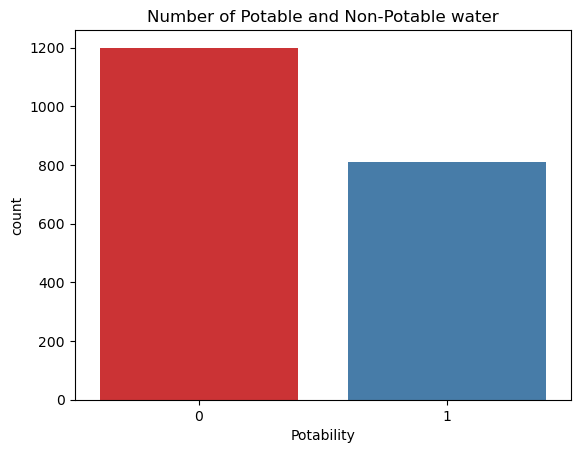

In [8]:
# Data Visualization
sns.countplot(x='Potability',data=water,palette='Set1')
plt.title('Number of Potable and Non-Potable water')
plt.show()

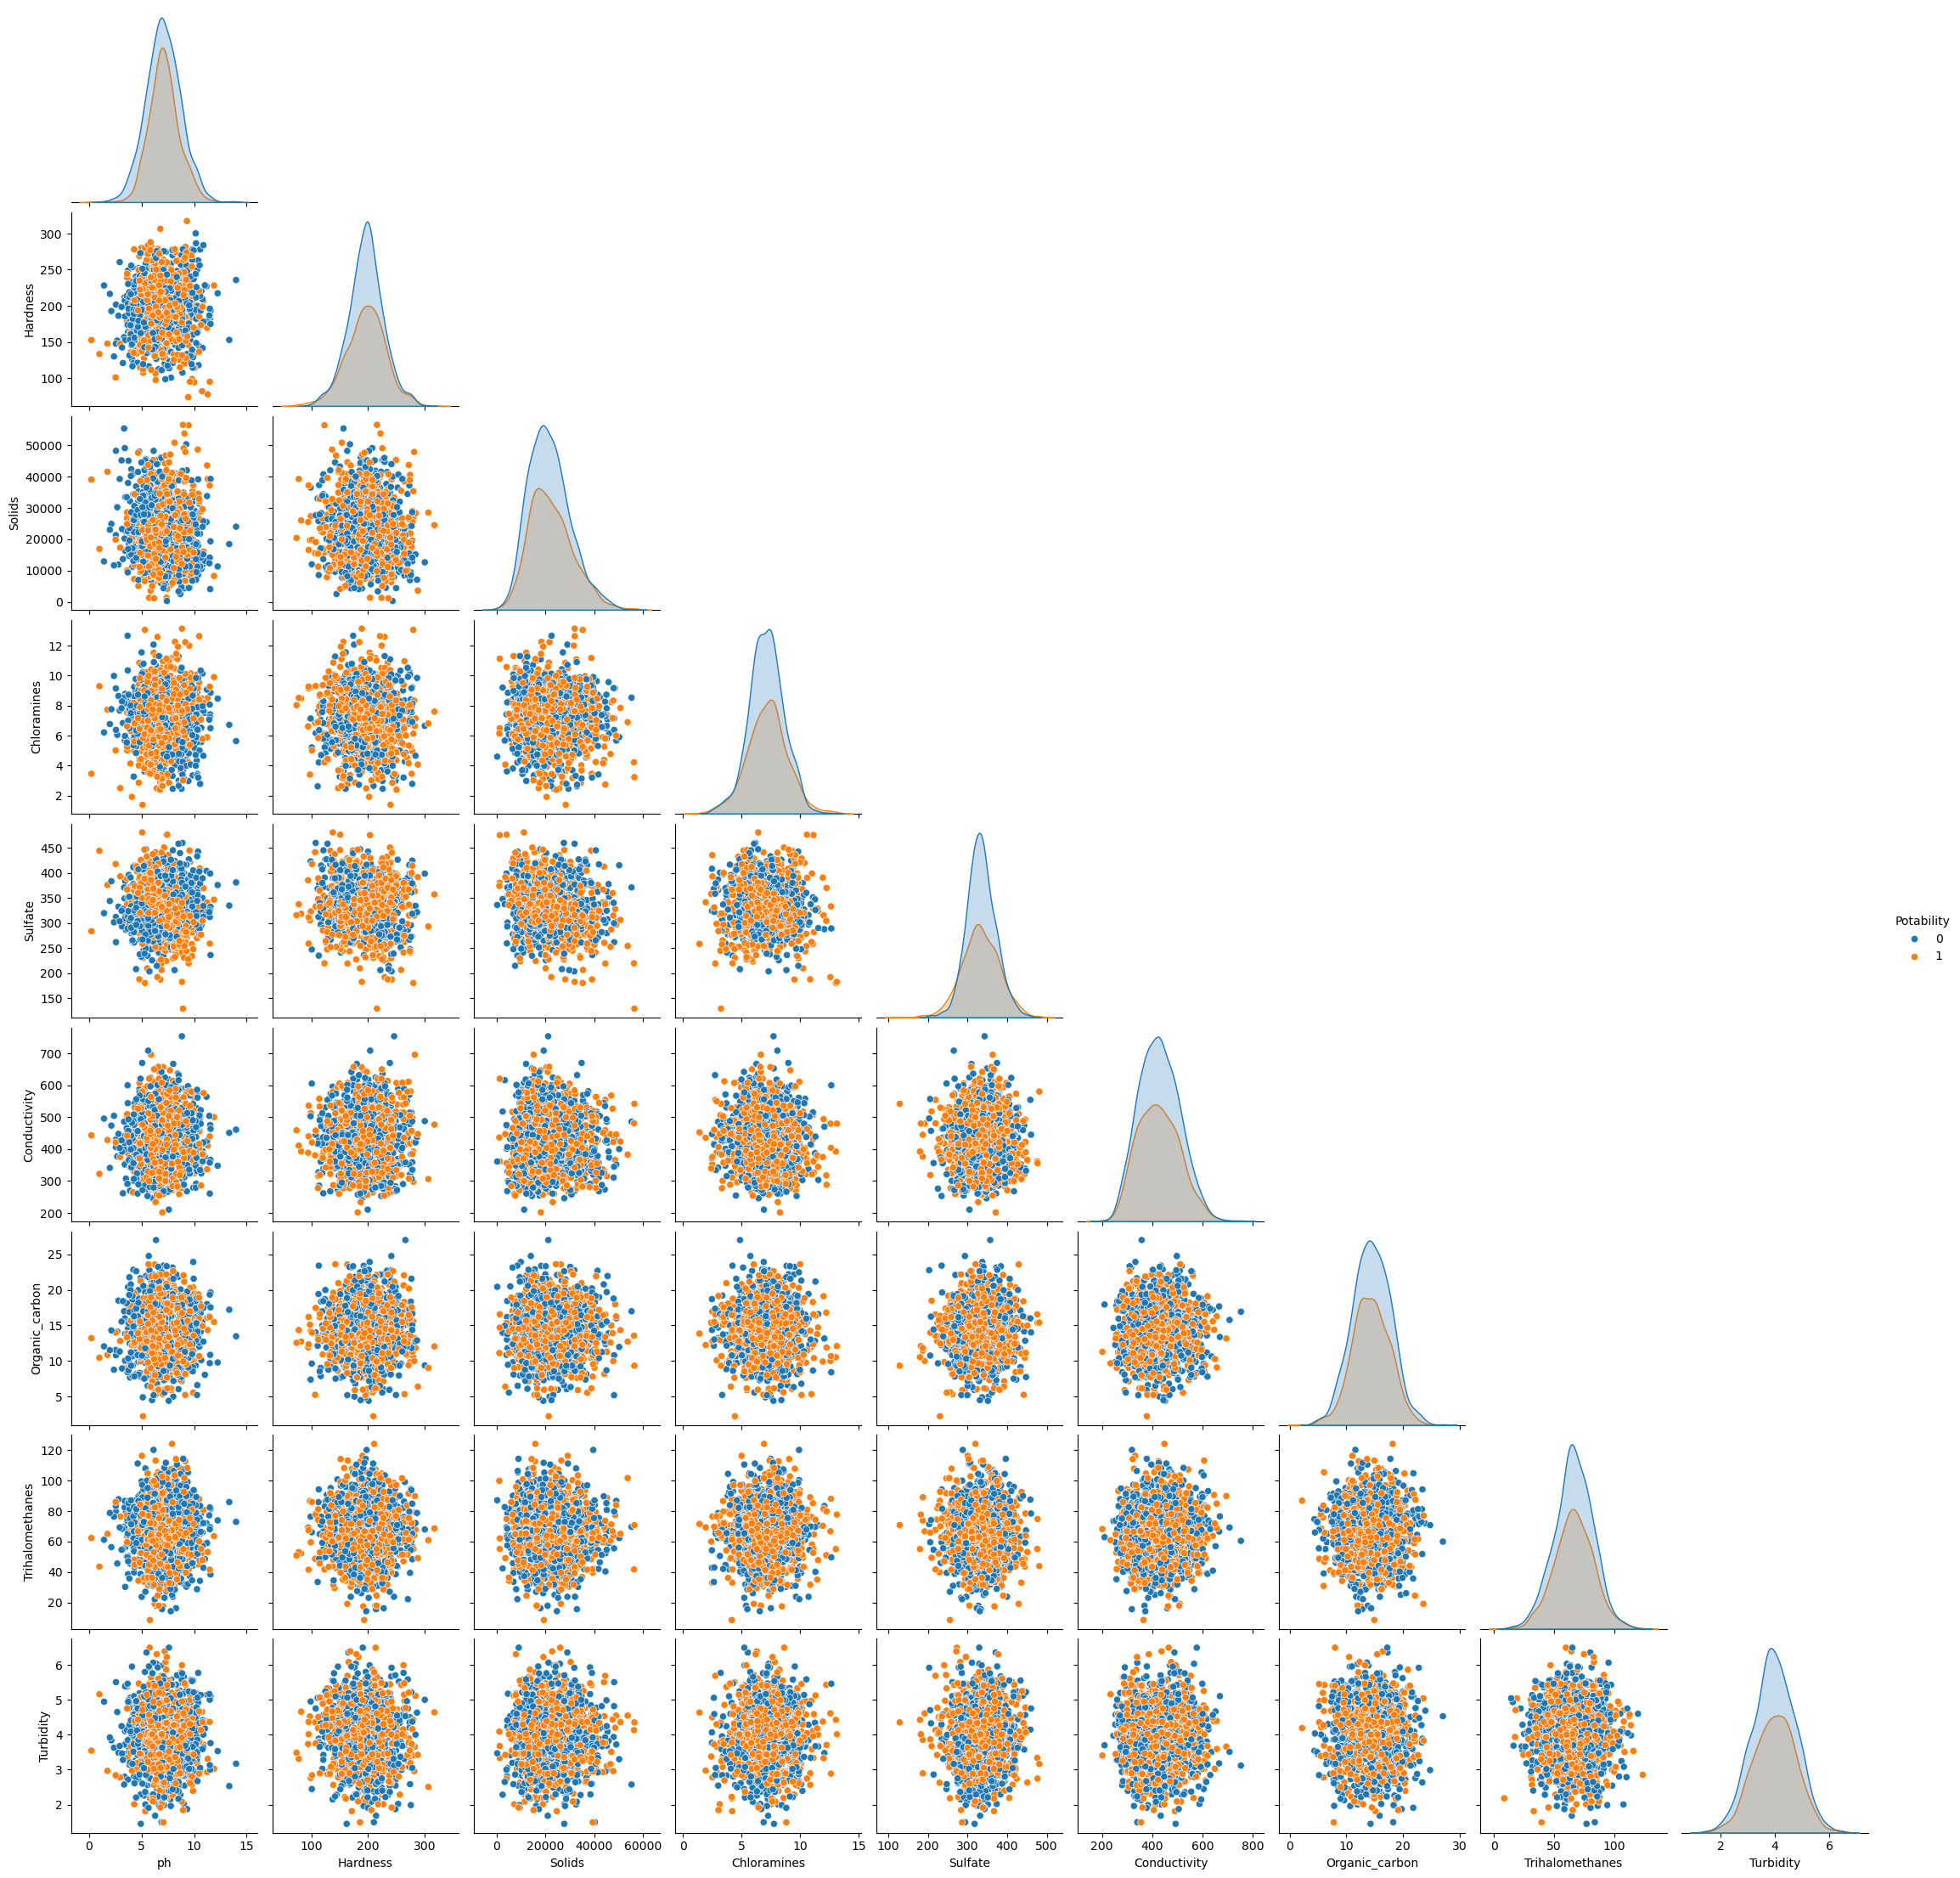

In [9]:
sns.pairplot(data=water,hue='Potability',corner=True)
plt.show()

In [10]:
water_corr = water.corr()
water_corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.040674
Turbidity          0.022682
Chloramines        0.020784
ph                 0.014530
Trihalomethanes    0.009244
Hardness          -0.001505
Sulfate           -0.015303
Conductivity      -0.015496
Organic_carbon    -0.015567
Name: Potability, dtype: float64

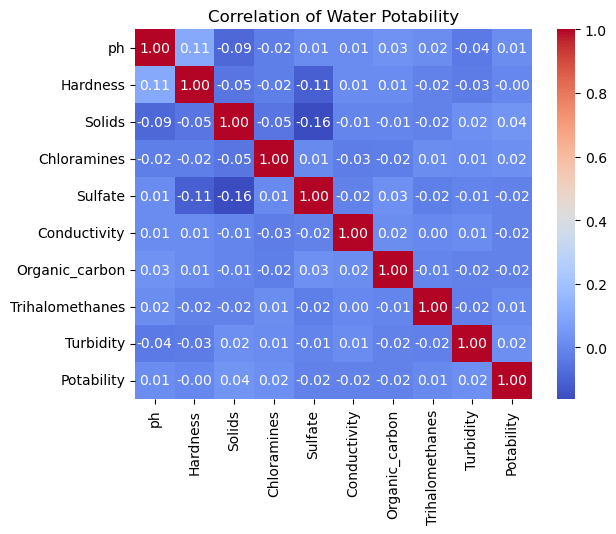

In [11]:
sns.heatmap(water.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation of Water Potability')
plt.show()

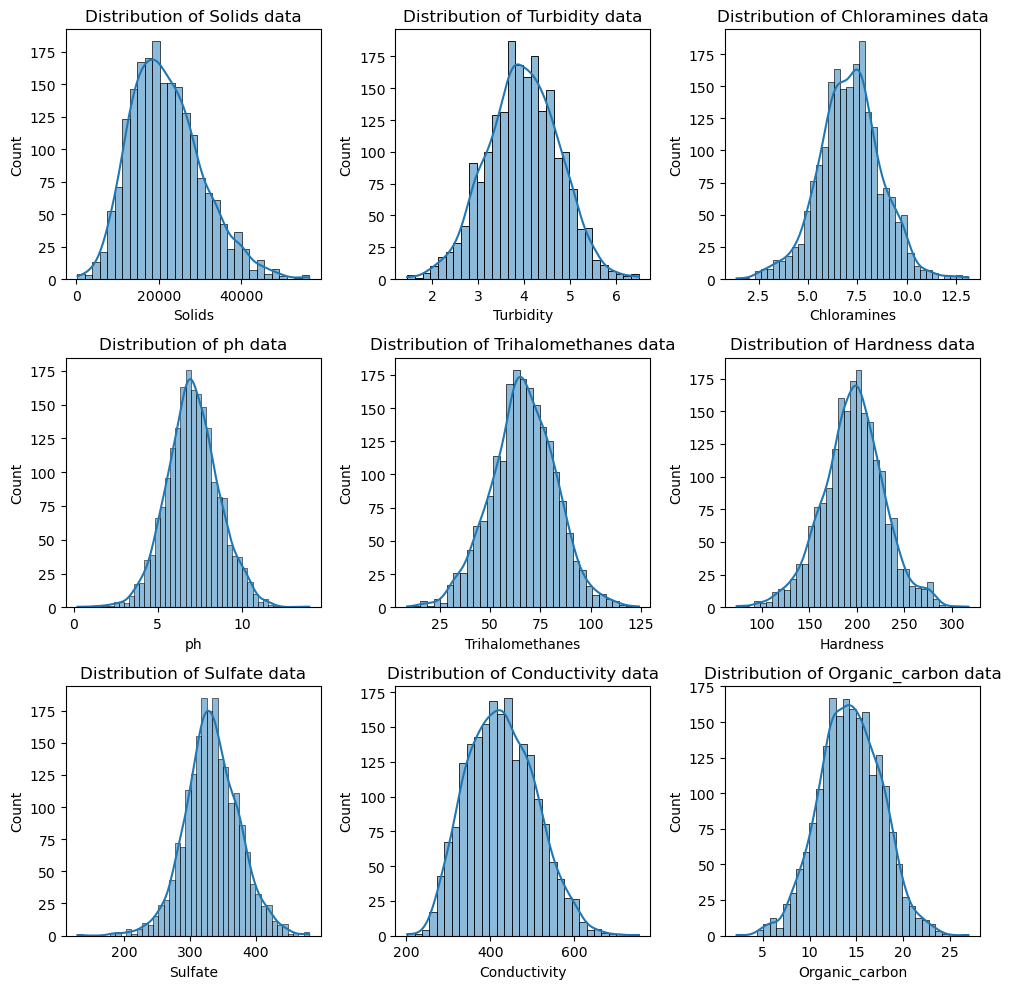

In [12]:
water_corr_potability = water_corr['Potability'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
for i, col in enumerate(water_corr_potability.index[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(water[col],kde=True)
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
    plt.plot

In [13]:
# KMeansClustering - delete outlier
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(water)
labels = kmeans.labels_
water_kmeans = water[labels == 1]
water_kmeans.reset_index(inplace=True)

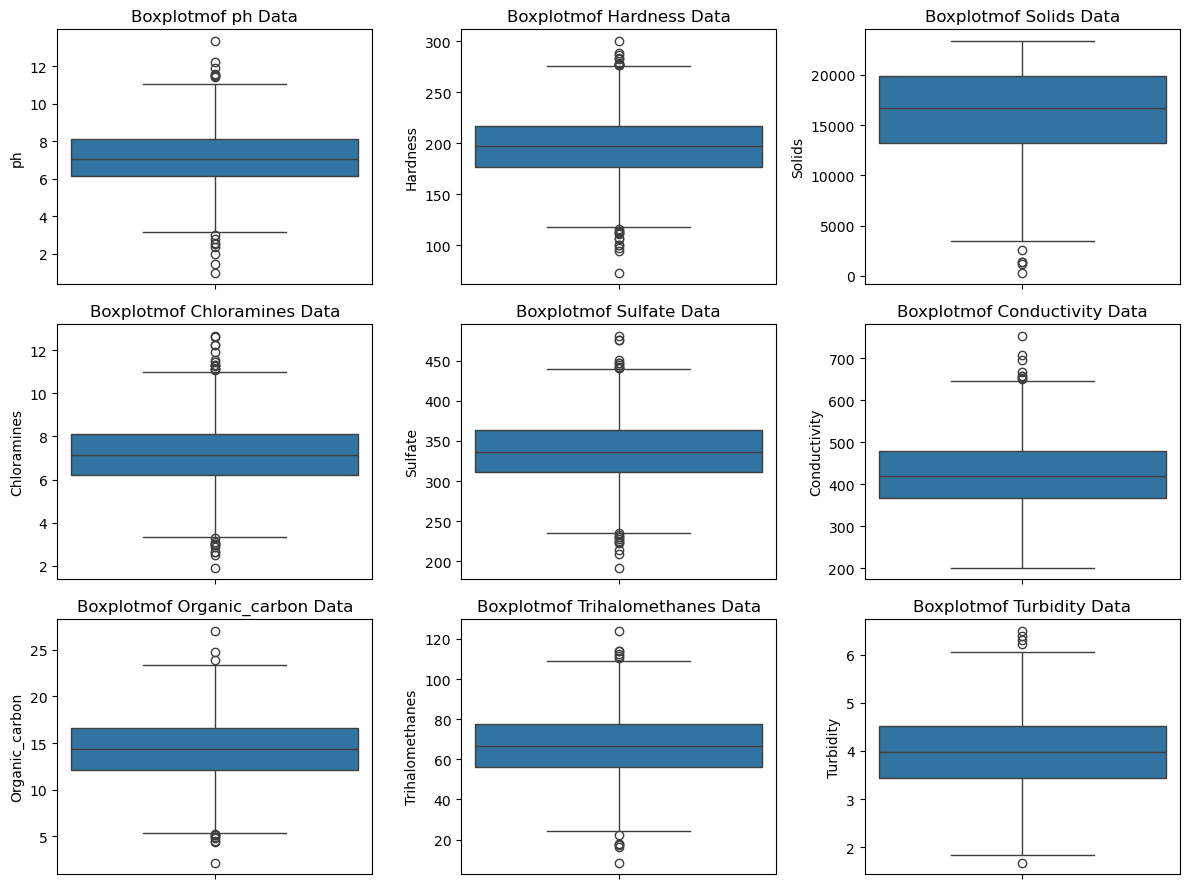

In [14]:
plt.figure(figsize=(12,9))
for i, col in enumerate(water_kmeans.columns[1:-1],1):
    plt.subplot(3,3,i)
    sns.boxplot(water_kmeans[col])
    plt.title(f"Boxplotmof {col} Data")
    plt.tight_layout()
    plt.plot()

In [15]:
# Model Building 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [16]:
# Features and target
X = water_kmeans.iloc[:, :-1]
y = water_kmeans.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [17]:
# Define ML models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc * 100 
    
# Model Accuracy
for model, acc in results.items():
    print(f"{model}: {acc:.2f}% accuracy")


Random Forest: 77.78% accuracy
Decision Tree: 97.94% accuracy
Gradient Boosting: 99.18% accuracy


<Axes: >

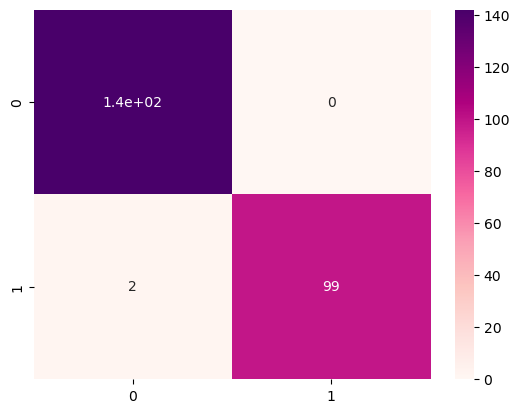

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
preds = gbc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, preds), cmap = 'RdPu', annot = True)

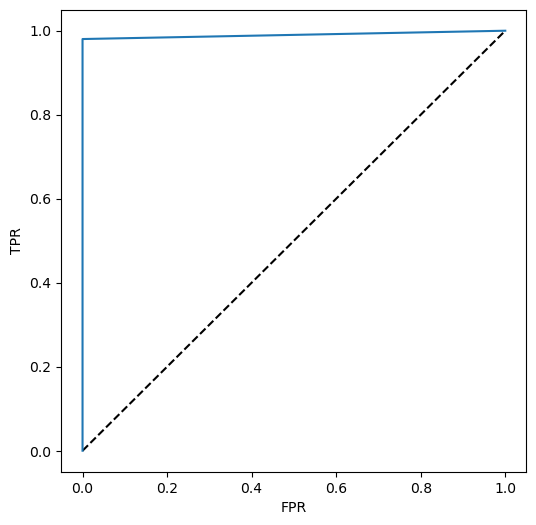

In [19]:
# Measure ROC Curve to Determine the Classifier's Performance 
plt.figure(figsize = (6, 6))
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [20]:
# ROC Accuracy score 
y_pred_prob = gbc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

0.9948054664621391